In [1]:
import numpy as np
from astropy.io import ascii #You need this to read in the data file from the paper
import matplotlib.pyplot as plt #You need this to be able to plot!

#This line is key if you want your plots to show up in the Jupyter notebook!
%matplotlib inline

In [2]:
data = ascii.read('./data-Copy1.dat')

In [3]:
data

ra,dec,run,Ar,u,g,r,i,z,uErr,gErr,rErr,iErr,zErr,pmL,pmB,pmErr
float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
181.6122,27.5726,5087,0.05,16.4,15.24,14.8,14.73,14.69,0.02,0.02,0.02,0.02,0.01,5.16,-1.45,2.72
181.61303,27.6077,5087,0.05,21.84,19.55,18.4,18.04,17.79,0.18,0.02,0.02,0.02,0.02,5.48,4.73,3.16
181.61416,27.35956,5112,0.05,19.76,17.56,16.61,16.23,16.07,0.03,0.01,0.02,0.03,0.03,3.14,7.92,2.79
181.6164,27.82464,5112,0.06,21.73,20.63,20.19,19.99,20.04,0.16,0.03,0.03,0.03,0.13,19.13,-1.08,5.08
181.62112,28.01623,5087,0.05,21.37,20.38,20.11,20.05,19.87,0.11,0.04,0.03,0.03,0.09,-3.65,-8.0,4.91
181.62252,27.63987,5087,0.05,17.34,15.58,14.82,14.64,14.51,0.02,0.02,0.02,0.02,0.01,9.74,-10.64,2.72
181.62469,27.32682,5112,0.05,21.63,20.52,20.21,20.1,19.91,0.13,0.02,0.03,0.04,1.07,6.73,-25.39,5.13
181.62582,27.42162,5112,0.05,23.16,21.09,19.67,19.04,18.66,0.46,0.03,0.02,0.03,0.04,35.17,7.8,4.18
181.63178,26.93836,5112,0.05,18.57,15.96,14.77,14.25,13.96,0.02,0.02,0.02,0.02,0.02,15.96,-8.01,2.72


In [14]:
x= np.array(data["u"])-np.array(data["g"]) #u minus g
y= np.array(data["g"])-np.array(data["r"]) #g minus r
#[Fe/H]
def metallicity(x,y):
    """this function takes the u-g and g-r values and calculates the metallicity"""
    
    #Calculate the masks
    result = np.copy(y);
    mask = y < 0.6;
    
    #given values from pdf
    a=-13.13
    b=14.09
    c=28.04
    d=-5.51
    e=-5.90
    f=-58.68
    g=9.14
    h=-20.61
    i=0.0
    j=58.20
    
    result[mask]= a+b*x[mask]+c*y[mask]+d*x[mask]*y[mask]+e*(x[mask]**2)+f*(y[mask]**2)+g*(x[mask]**2)*y[mask]+h*x[mask]*(y[mask]**2)+i*(x[mask]**3)+j*(y[mask]**3)
    
    #Set all values greater than 0.6 to -0.6
    result[np.invert(mask)] = -0.6                                                                                      
        
    return result

result = metallicity(x,y)
print("g-r:", y[:10])
print("Result:", result[:10])

g-r: [0.44 1.15 0.95 0.44 0.27 0.76 0.31 1.42 1.19 0.98]
Result: [-0.8191296  -0.6        -0.6        -1.0249488  -1.06648793 -0.6
 -0.57584997 -0.6        -0.6        -0.6       ]


In [4]:
#A2
def delta_magnitude(metallicity):
    """This is the function that takes metallicity to calculate magnitude V-r"""
    
    delta_mr= 4.50 -1.11*metallicity -0.18*metallicity**2
    
    return delta_mr

delta_magnitude(result)

array([5.28845866, 5.1012    , 5.1012    , ..., 5.1012    , 5.1012    ,
       5.1012    ])

In [5]:
#A7
g_minus_i = np.array(data["g"])-np.array(data["i"])
def initial_m(g_minus_i):
    """Fifth order polynomial fit using g minus i input"""
    m_initial=-5.06+14.32*(g_minus_i)-12.97*(g_minus_i)**2+6.127*(g_minus_i)**3-1.267*(g_minus_i)**4+0.0967*(g_minus_i)**5
    
    return m_initial

initial_m(g_minus_i)

array([-0.39992303,  2.25743457,  1.89554651, ...,  7.04348138,
        5.12221151,  4.88618184])

In [6]:
#A3
m_initial_gmi= initial_m(g_minus_i)
delta_m= delta_magnitude(result)

def absolute_magnitude(g_minus_i,metallicity):
    """Input delta magnitude and metallicity to calculate absolute magnitude"""
    
    abs_mag= initial_m(g_minus_i) + delta_magnitude(metallicity)
    
    return abs_mag

absolute_magnitude(g_minus_i,result)


array([ 4.88853564,  7.35863457,  6.99674651, ..., 12.14468138,
       10.22341151,  9.98738184])

In [7]:
# Compute D
r=np.array(data["r"])
M_r= absolute_magnitude(g_minus_i,result)
r_minus_Mr= r - M_r
def distance(r,M_r):
    """This function takes values of r and Mr to calculate the distance"""
    
    distance=10*10**(r_minus_Mr/5)
    
    return distance

distance(r,M_r)    

array([ 960.04783539, 1615.37399051,  836.85593009, ...,  248.34974785,
        473.49750882, 1338.20802884])

## Problem 1

In [8]:
#Compute density from volume and number
D = distance(r,M_r)
def density(D, distance, delta):
    """Take the volume of a shell and the numbe of stars within the bin to compute the density"""
    
    volume= (314/41253)*4/3*np.pi*((delta + distance)**3-delta**3)
    
    #Calculate the number of stars 
    numbers_mask= np.logical_and(D >= distance, D <= delta + distance)
    number_stars= np.count_nonzero(numbers_mask)
    
    return number_stars/volume

density(D, 500, 10)


0.0006573169342465981

C:\Users\emily\AppData\Local\Temp\ipykernel_9352\1126673696.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return number_stars/volume


Text(0.5, 1.0, 'Stellar Density vs Distance')

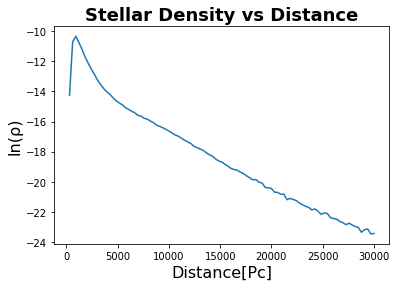

In [9]:
#plot ln(density)
y= np.array(data["g"])-np.array(data["r"]) #g minus r

stars_mask = np.logical_and(y > 0.2, y < 0.4)

initial = 0
final = 30000
bins = 100
bin_width = ((final - initial)/ bins)
points = np.linspace(initial, final, num = bins)

nl_density = []
for i in points:
    nl_density.append(np.log(density(D[stars_mask], i, bin_width)))
    
plt.plot(points, nl_density)

plt.xlabel('Distance[Pc]', fontsize = 16)
plt.ylabel('ln(\u03C1)', fontsize = 16)
plt.title('Stellar Density vs Distance', fontweight='bold', fontsize=18)

## Problem 2

C:\Users\emily\AppData\Local\Temp\ipykernel_9352\1126673696.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return number_stars/volume
C:\Users\emily\AppData\Local\Temp\ipykernel_9352\1749852895.py:19: RuntimeWarning: divide by zero encountered in log
  nl_density[j][i] = np.log(density(D[masks[j]], points[i], bin_width))


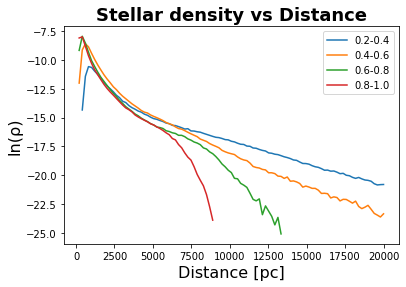

In [25]:
#create masks for g-r ranges
masks= []
masks.append(np.logical_and(y > 0.2, y < 0.4))
masks.append(np.logical_and(y > 0.4, y < 0.6))
masks.append(np.logical_and(y > 0.6, y < 0.8))
masks.append(np.logical_and(y> 0.8, y < 1.0)) 

#set boundaries
initial = 0
final = 20000
bins = 100
bin_width = ((final - initial)/ bins)
points = np.linspace(initial, final, num = bins)

#calculate ln(density) 
nl_density = np.zeros((len(masks), bins))
for i in range(len(points)):
    for j in range(len(masks)):
        nl_density[j][i] = np.log(density(D[masks[j]], points[i], bin_width))
        
line_colors = ["darkblue", "crimson", "violet", "orange"]
mask_labels = ["0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0"]

#plot
for i in range(len(masks)):
    plt.plot(points, nl_density[i])

#Set the axes labels and plot label
plt.xlabel("Distance [pc]", fontsize = 16)
plt.ylabel("ln(\u03C1)", fontsize = 16)
plt.title("Stellar density vs Distance", fontweight= 'bold' , fontsize = 18)
plt.legend(mask_labels)

## Problem 3 